In [84]:
import pandas as pd
from os import listdir
import numpy as np
import re
import matplotlib.pyplot as plt

In [85]:
listdir()

['depth_recursion.png',
 'ratio_backtrack.png',
 'S3_1000_sudokus_r1.infer',
 'S5_1000_sudokus_r1.infer',
 'S6_1000_sudokus_r1.infer',
 'ratio_recursion.png',
 'perf2.png',
 '.ipynb_checkpoints',
 'post_processing.ipynb',
 'depth_backtrack.png',
 'perf.png',
 'S2_1000_sudokus_r1.infer',
 '.gitignore',
 'S4_1000_sudokus_r1.infer',
 'S7_1000_sudokus_r1.infer',
 'S1_1000_sudokus_r10.infer']

In [86]:

regex = re.compile(r'\d+')

def filename2int(filename):
    return regex.findall(filename)[0]


def sort_df(df, column_idx):
    '''Takes dataframe, column index and custom function for sorting, 
    returns dataframe sorted by this column using this function'''
    
    col = df[column_idx]
    temp = np.array(col.values.tolist())
    name = [filename2int(l) for l in temp]
    df[column_idx] = name
    df[column_idx] = pd.to_numeric(df[column_idx])
    return df.sort_values(by=[column_idx])

def get_dataframe(filename):
    df = pd.read_pickle(filename)
    df = sort_df(df, 'sudoku')
    return df


def average_simplification_factor(dataframe):
    vals = []
    for v in dataframe['simplification_factor']:
        vals.append(np.mean(v))
    return np.mean(vals), np.std(vals)


In [87]:
# Load data
data = {
    "DPLL": (get_dataframe("S1_1000_sudokus_r10.infer"), 'y'),
    "MOM's": (get_dataframe("S2_1000_sudokus_r1.infer"), 'r'),
    "JW": (get_dataframe("S3_1000_sudokus_r1.infer"), 'b'),
    "JW2": (get_dataframe("S4_1000_sudokus_r1.infer"), 'g'),
}


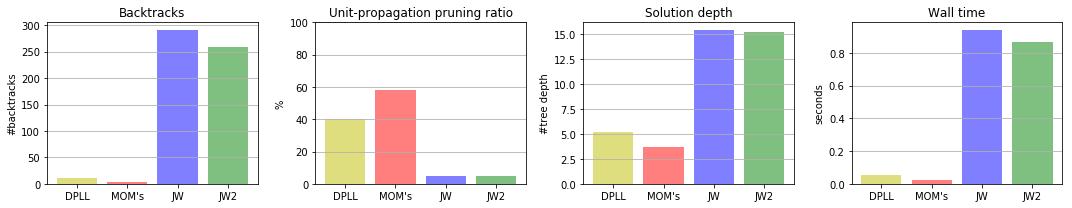

In [88]:
objects = list(data.keys())
colors = [dc[1] for n, dc in data.items()]
ALPHA=0.5

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(1, 4, figsize=(15,3))

# Plot [0, 0] the number of recursions
pl = axarr[0]
pl.set_title('Backtracks')
performance = []

for k, dc in data.items():
    df, _ = dc
    d = df.loc[df['recursion'] != 0]
    performance.append(np.mean(d['backtrack']))

y_pos = np.arange(len(objects))
pl.yaxis.grid(True)
pl.bar(y_pos, performance, align='center', color=colors, alpha=ALPHA)
pl.set_xticks(range(len(objects)))
pl.set_xticklabels(objects)
#pl.set_yscale('log')
pl.set_ylabel('#backtracks')

pl = axarr[1]
pl.set_title('Unit-propagation pruning ratio')
performance = []
for k, dc in data.items():
    df, _ = dc
    d = df.loc[df['recursion'] != 0]
    mean , std = average_simplification_factor(d) 
    performance.append(mean * 100)

y_pos = np.arange(len(objects))
pl.yaxis.grid(True)
pl.bar(y_pos, performance, align='center', color=colors, alpha=ALPHA)
pl.set_xticks(range(len(objects)))
pl.set_xticklabels(objects)
pl.set_ylim((0, 100))
pl.set_ylabel('%')


pl = axarr[2]
pl.set_title('Solution depth')
performance = []
for k, dc in data.items():
    df, _ = dc
    d = df.loc[df['recursion'] != 0]
    performance.append(np.mean(d['depth']))

y_pos = np.arange(len(objects))
pl.yaxis.grid(True)
pl.bar(y_pos, performance, align='center', color=colors, alpha=ALPHA)
pl.set_xticks(range(len(objects)))
pl.set_xticklabels(objects)
#pl.set_yscale('log')
pl.set_ylabel('#tree depth')

pl = axarr[3]
pl.set_title('Wall time')
performance = []
for k, dc in data.items():
    df, _ = dc
    d = df.loc[df['recursion'] != 0]
    performance.append(np.mean(d['solution_time']))

y_pos = np.arange(len(objects))
pl.yaxis.grid(True)
pl.bar(y_pos, performance, align='center', color=colors, alpha=ALPHA)
pl.set_xticks(range(len(objects)))
pl.set_xticklabels(objects)
#pl.set_yscale('log')
pl.set_ylabel('seconds')

f.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.savefig("perf.png")
plt.show()

In [89]:
# Load data
data = {
    "DPLL": (get_dataframe("S1_1000_sudokus_r10.infer"), 'y'),
    "MOM's": (get_dataframe("S2_1000_sudokus_r1.infer"), 'r'),
    "MOMmin": (get_dataframe("S5_1000_sudokus_r1.infer"), 'r'),
    "JWmin": (get_dataframe("S6_1000_sudokus_r1.infer"), 'b'),
    "JW2min": (get_dataframe("S7_1000_sudokus_r1.infer"), 'g'),
}


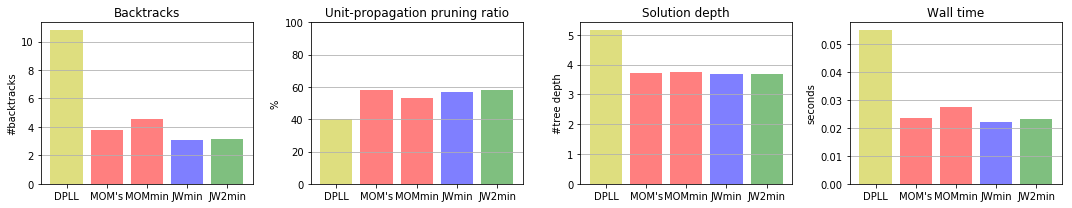

In [90]:
objects = list(data.keys())
colors = [dc[1] for n, dc in data.items()]


# Four axes, returned as a 2-d array
f, axarr = plt.subplots(1, 4, figsize=(15,3))

# Plot [0, 0] the number of recursions
pl = axarr[0]
pl.set_title('Backtracks')
performance = []

for k, dc in data.items():
    df, _ = dc
    d = df.loc[df['recursion'] != 0]
    performance.append(np.mean(d['backtrack']))

y_pos = np.arange(len(objects))
pl.yaxis.grid(True)
pl.bar(y_pos, performance, align='center', color=colors, alpha=ALPHA)
pl.set_xticks(range(len(objects)))
pl.set_xticklabels(objects)
#pl.set_yscale('log')
pl.set_ylabel('#backtracks')

pl = axarr[1]
pl.set_title('Unit-propagation pruning ratio')
performance = []
for k, dc in data.items():
    df, _ = dc
    d = df.loc[df['recursion'] != 0]
    mean , std = average_simplification_factor(d) 
    performance.append(mean * 100)

y_pos = np.arange(len(objects))
pl.yaxis.grid(True)
pl.bar(y_pos, performance, align='center', color=colors, alpha=ALPHA)
pl.set_xticks(range(len(objects)))
pl.set_xticklabels(objects)
pl.set_ylim((0, 100))
pl.set_ylabel('%')


pl = axarr[2]
pl.set_title('Solution depth')
performance = []
for k, dc in data.items():
    df, _ = dc
    d = df.loc[df['recursion'] != 0]
    performance.append(np.mean(d['depth']))

y_pos = np.arange(len(objects))
pl.yaxis.grid(True)
pl.bar(y_pos, performance, align='center', color=colors, alpha=ALPHA)
pl.set_xticks(range(len(objects)))
pl.set_xticklabels(objects)
#pl.set_yscale('log')
pl.set_ylabel('#tree depth')

pl = axarr[3]
pl.set_title('Wall time')
performance = []
for k, dc in data.items():
    df, _ = dc
    d = df.loc[df['recursion'] != 0]
    performance.append(np.mean(d['solution_time']))

y_pos = np.arange(len(objects))
pl.yaxis.grid(True)
pl.bar(y_pos, performance, align='center', color=colors, alpha=ALPHA)
pl.set_xticks(range(len(objects)))
pl.set_xticklabels(objects)
#pl.set_yscale('log')
pl.set_ylabel('seconds')



f.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.savefig("perf2.png")
plt.show()

In [91]:
from scipy import stats

data = {
    "DPLL": (get_dataframe("S1_1000_sudokus_r10.infer"), 'y'),
    "MOM's": (get_dataframe("S2_1000_sudokus_r1.infer"), 'r'),
    "JW": (get_dataframe("S3_1000_sudokus_r1.infer"), 'b'),
    "JW2": (get_dataframe("S4_1000_sudokus_r1.infer"), 'g'),
    "MOMmin": (get_dataframe("S5_1000_sudokus_r1.infer"), 'r'),
    "JWmin": (get_dataframe("S6_1000_sudokus_r1.infer"), 'b'),
    "JW2min": (get_dataframe("S7_1000_sudokus_r1.infer"), 'g'),
}


for n1, d1 in data.items():
    for n2, d2 in data.items():
        da = d1[0]['recursion']
        db = d2[0]['recursion']
        s, p = stats.ttest_ind(da, db, equal_var = False)
        print("%s vs %s = %s" % (n1, n2, "nR" if p > 0.05 else "R"))


#np.mean(data["MOM's"][0]['solution_time'])
#np.mean(data["MOM's"][0]['solution_time'])

DPLL vs DPLL = nR
DPLL vs MOM's = R
DPLL vs JW = R
DPLL vs JW2 = R
DPLL vs MOMmin = R
DPLL vs JWmin = R
DPLL vs JW2min = R
MOM's vs DPLL = R
MOM's vs MOM's = nR
MOM's vs JW = R
MOM's vs JW2 = R
MOM's vs MOMmin = R
MOM's vs JWmin = R
MOM's vs JW2min = nR
JW vs DPLL = R
JW vs MOM's = R
JW vs JW = nR
JW vs JW2 = nR
JW vs MOMmin = R
JW vs JWmin = R
JW vs JW2min = R
JW2 vs DPLL = R
JW2 vs MOM's = R
JW2 vs JW = nR
JW2 vs JW2 = nR
JW2 vs MOMmin = R
JW2 vs JWmin = R
JW2 vs JW2min = R
MOMmin vs DPLL = R
MOMmin vs MOM's = R
MOMmin vs JW = R
MOMmin vs JW2 = R
MOMmin vs MOMmin = nR
MOMmin vs JWmin = R
MOMmin vs JW2min = R
JWmin vs DPLL = R
JWmin vs MOM's = R
JWmin vs JW = R
JWmin vs JW2 = R
JWmin vs MOMmin = R
JWmin vs JWmin = nR
JWmin vs JW2min = nR
JW2min vs DPLL = R
JW2min vs MOM's = nR
JW2min vs JW = R
JW2min vs JW2 = R
JW2min vs MOMmin = R
JW2min vs JWmin = nR
JW2min vs JW2min = nR
